In [2254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2255]:
nominal_power = [120, 0, 0, 40, 25, 20, 0, 0, 0]

# weather = pd.read_csv("../data/citylearn_challenge_2021/weather.csv")
# weather["datetime"] = pd.date_range(start='2008-01-02 00:00:00', end='2011-12-31 23:59:59', freq='h')

# for i in range(1,10):
#     df_b = pd.read_csv("../data/citylearn_challenge_2021/Building_"+str(i)+".csv")

#     for df in [weather, df_b]:
#         df["datetime"] = pd.date_range(start='2008-01-02 00:00:00', end='2011-12-31 23:59:59', freq='h')

#     weather = weather.set_index("datetime")

#     df_b = (df_b.drop(columns=["Heating Load [kWh]"])
#     .assign(holiday = df_b["Day Type"] == 8,)
#         #datetime = pd.date_range(start='2008-01-02 01:00:00', end='2012-01-01', freq='h'))
#     .assign(workday = (df_b.datetime.dt.weekday >= 1) & (df_b.datetime.dt.weekday <= 5) & (df_b["Day Type"] != 8) )
#     .drop(columns=["Month", "Hour", "Day Type"])
#     .set_index("datetime")
#     )

#     df = pd.concat([df_b, weather], axis=1)

#     # Total load
#     df['total_load'] = df['Equipment Electric Power [kWh]'] + df['DHW Heating [kWh]'] + df['Cooling Load [kWh]']

#     # Solar generation in kWh
#     df['Solar Generation [W/kW]'] = df['Solar Generation [W/kW]'].fillna(0)
#     df['Solar Generation [kWh]'] = df['Solar Generation [W/kW]']*nominal_power[i-1]/1000

#     #df.to_csv("../data/citylearn_challenge_2021/Building_"+str(i)+"_comb.csv")




In [2256]:
building_num = 4

weather = pd.read_csv("../data/citylearn_challenge_2021/weather.csv")
b = pd.read_csv("../data/citylearn_challenge_2021/Building_"+str(building_num)+".csv")

for df in [weather, b]:
        df["datetime"] = pd.date_range(start='2008-01-02 00:00:00', end='2011-12-31 23:59:59', freq='h')

weather = weather.set_index("datetime")

b = (b.drop(columns=["Heating Load [kWh]"])
.assign(holiday = b["Day Type"] == 8,)
        #datetime = pd.date_range(start='2008-01-02 01:00:00', end='2012-01-01', freq='h'))
.assign(workday = (b.datetime.dt.weekday >= 1) & (b.datetime.dt.weekday <= 5) & (b["Day Type"] != 8) )
.drop(columns=["Month", "Hour", "Day Type"])
.set_index("datetime")
)

#combine both datasets
df = pd.concat([b, weather], axis=1)

# Total load
df['total_load'] = df['Equipment Electric Power [kWh]'] + df['DHW Heating [kWh]'] + df['Cooling Load [kWh]']

# Solar generation in kWh
df['Solar Generation [kWh]'] = df['Solar Generation [W/kW]']*nominal_power[building_num-1]/1000


In [2257]:
# Group by workdays in Jan and Jul
df_workday_jan = df[(df.index.month == 1) & (df.workday == True)]
df_workday_jul = df[(df.index.month == 7) & (df.workday == True)]

# Group by weekends in Jan and Jul
df_weekend_jan = df[(df.index.month == 1) & (df.workday == False)]
df_weekend_jul = df[(df.index.month == 7) & (df.workday == False)]

# Group by holidays in Jan and Jul
df_holiday_jan = df[(df.index.month == 1) & (df.holiday == True)]
df_holiday_jul = df[(df.index.month == 7) & (df.holiday == True)]

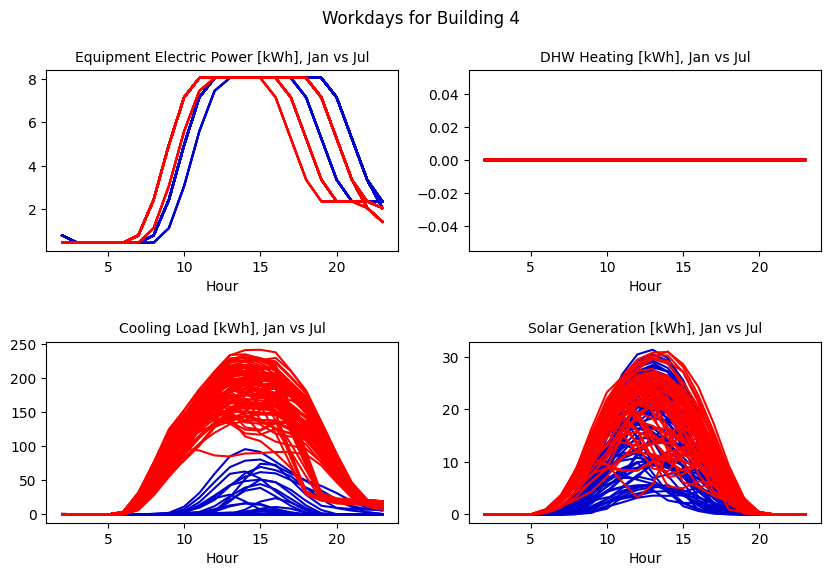

In [2258]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

plt.subplot(2, 2, 1)
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot1 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[0,0].plot("Equipment Electric Power [kWh]", data=df_plot1, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot1 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[0,0].plot("Equipment Electric Power [kWh]", data=df_plot1, label=idx, color="red")
ax[0,0].set_title('Equipment Electric Power [kWh], Jan vs Jul',fontsize=10)
ax[0,0].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 2)
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot2 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[0,1].plot("DHW Heating [kWh]", data=df_plot2, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot2 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[0,1].plot("DHW Heating [kWh]", data=df_plot2, label=idx, color="red")
ax[0,1].set_title('DHW Heating [kWh], Jan vs Jul',fontsize=10)
ax[0,1].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 3)
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot3 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[1,0].plot("Cooling Load [kWh]", data=df_plot3, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot3 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[1,0].plot("Cooling Load [kWh]", data=df_plot3, label=idx, color="red")
ax[1,0].set_title('Cooling Load [kWh], Jan vs Jul',fontsize=10)
ax[1,0].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 4)
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot4 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[1,1].plot("Solar Generation [kWh]", data=df_plot4, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot4 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[1,1].plot("Solar Generation [kWh]", data=df_plot4, label=idx, color="red")
ax[1,1].set_title('Solar Generation [kWh], Jan vs Jul',fontsize=10)
ax[1,1].set_xlabel("Hour", fontsize=10)

fig.suptitle('Workdays for Building '+str(building_num))
plt.subplots_adjust(hspace = 0.5)

plt.show()


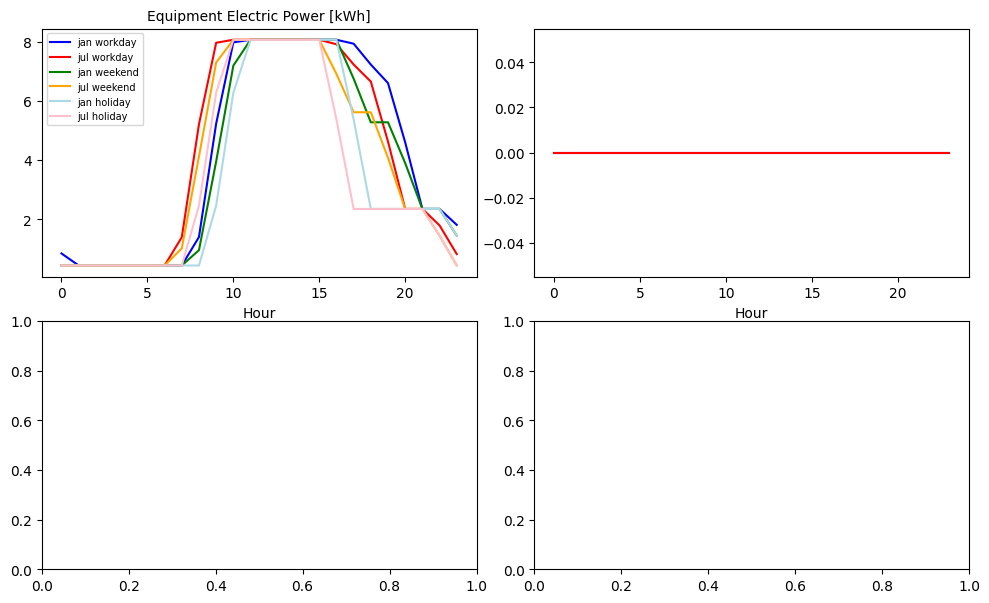

In [2259]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))
fig.tight_layout()
plt.subplot(2, 2, 1)
col = "Equipment Electric Power [kWh]"
ax[0,0] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
ax[0,0] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
ax[0,0] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
ax[0,0] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
ax[0,0] = df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="jan holiday", color="lightblue")
ax[0,0] = df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="jul holiday", color="pink")
ax[0,0].set_title(col, fontsize=10)
ax[0,0].set_xlabel("Hour", fontsize=10)
ax[0,0].legend(fontsize=7, loc='upper left')

plt.subplot(2, 2, 2)
col = "DHW Heating [kWh]"
ax[0,1] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
#ax[0,1] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
# ax[0,1] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
# ax[0,1] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
# ax[0,1] = df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="jan holiday", color="lightblue")
# ax[0,1] = df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="jul holiday", color="pink")
# ax[0,1].set_title(col, fontsize=10)
ax[0,1].set_xlabel("Hour", fontsize=10)
# ax[0,1].legend(fontsize=7, loc='upper right')

# plt.subplot(2, 2, 3)
# col = "Cooling Load [kWh]"
# ax[1,0] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
# ax[1,0] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
# ax[1,0] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
# ax[1,0] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
# ax[1,0] = df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="jan holiday", color="lightblue")
# ax[1,0] = df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="jul holiday", color="pink")
# ax[1,0].legend(fontsize=7, loc='upper left')
# ax[1,0].set_xlabel("Hour", fontsize=10)
# ax[1,0].set_title(col, fontsize=10)

# plt.subplot(2, 2, 4)
# col = "Solar Generation [kWh]"
# ax[1,1] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
# ax[1,1] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
# ax[1,1] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
# ax[1,1] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
# ax[1,1] = df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="jan holiday", color="lightblue")
# ax[1,1] = df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="jul holiday", color="pink")
# ax[1,1].set_title(col, fontsize=10)
# ax[1,1].set_xlabel("Hour", fontsize=10)
# ax[1,1].legend(fontsize=7, loc='upper left')

#fig.suptitle('Average energy demand on workdays for Building 4 (strip mall retail)')
#plt.subplots_adjust(hspace = 0.4)
plt.show()

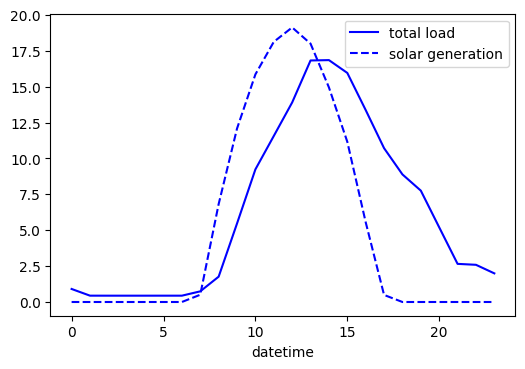

In [2260]:
fig, ax = plt.subplots(figsize=(6,4))
col = "total_load"
ax = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="total load", color="blue")

col = "Solar Generation [kWh]"
ax = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="solar generation", color="blue", linestyle='--')

plt.legend()
plt.show()

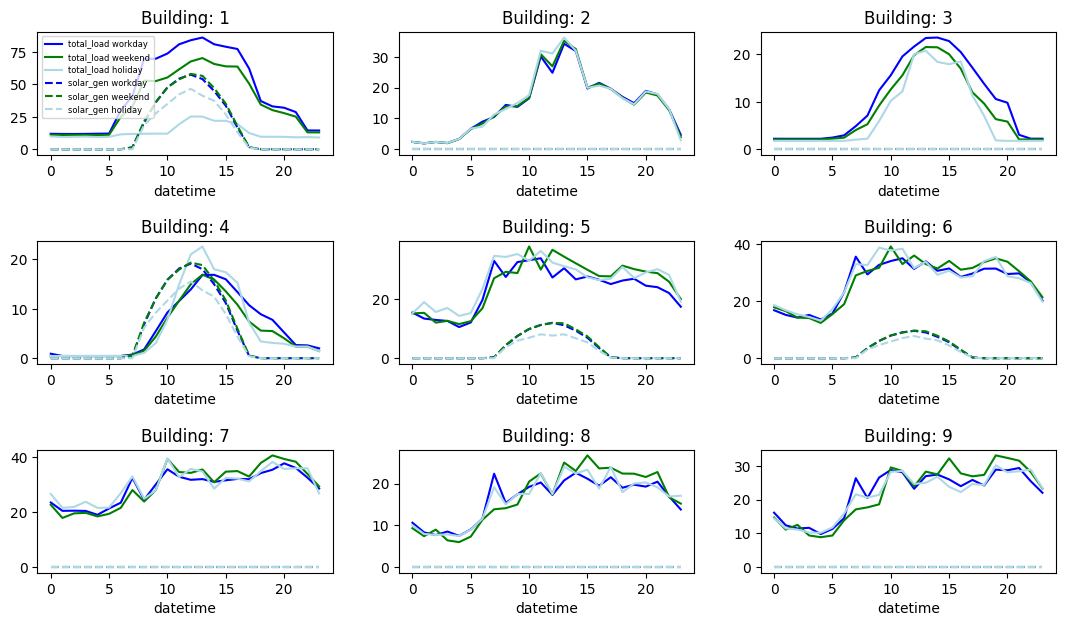

In [2261]:
fig, ax = plt.subplots(3, 3, figsize=(11,6))
fig.tight_layout()

for i in range(1,10):

    df = pd.read_csv("../data/citylearn_challenge_2021/Building_"+str(i)+"_comb.csv", parse_dates=True, index_col='datetime')

    # Group by workdays in Jan and Jul
    df_workday_jan = df[(df.index.month == 1) & (df.workday == True)]
    df_workday_jul = df[(df.index.month == 7) & (df.workday == True)]

    # Group by weekends in Jan and Jul
    df_weekend_jan = df[(df.index.month == 1) & (df.workday == False)]
    df_weekend_jul = df[(df.index.month == 7) & (df.workday == False)]

    # Group by holidays in Jan and Jul
    df_holiday_jan = df[(df.index.month == 1) & (df.holiday == True)]
    df_holiday_jul = df[(df.index.month == 7) & (df.holiday == True)]

    plt.subplot(3, 3, i)
    col = "total_load"
    df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="total_load workday", color="blue")
    df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="total_load weekend", color="green")
    df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="total_load holiday", color="lightblue")

    col = "Solar Generation [kWh]"
    df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="solar_gen workday", color="blue", linestyle='--')
    df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="solar_gen weekend", color="green", linestyle='--')
    df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="solar_gen holiday", color="lightblue", linestyle='--')
    plt.title('Building: '+str(i))

    if i == 1:
        plt.legend(fontsize=6, loc='upper left')

plt.subplots_adjust(hspace = 0.7)
plt.show()

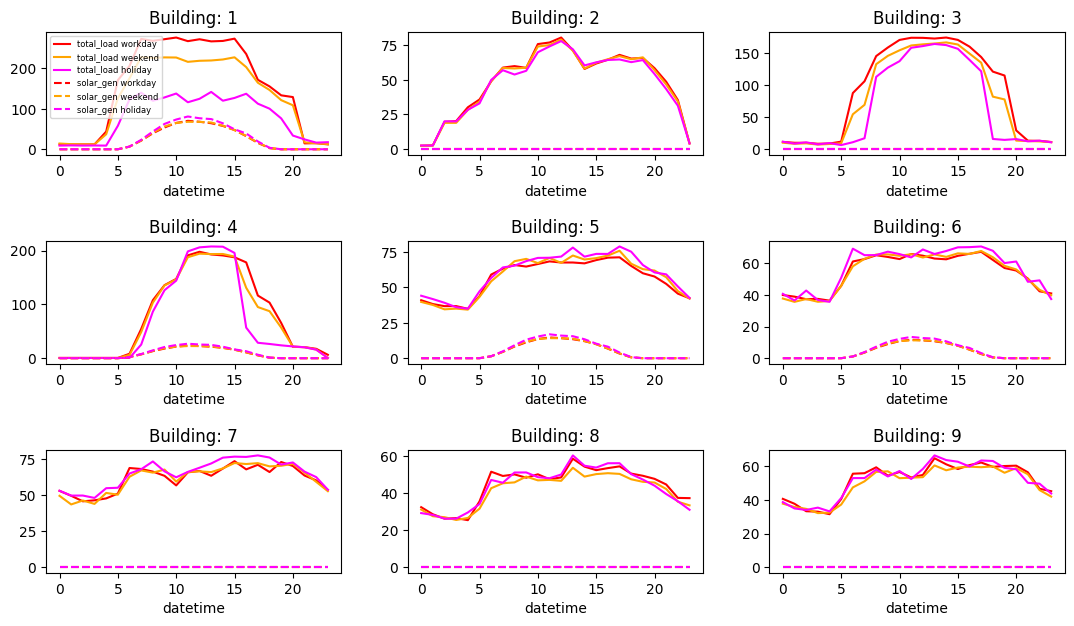

In [2262]:
fig, ax = plt.subplots(3, 3, figsize=(11,6))
fig.tight_layout()

for i in range(1,10):

    df = pd.read_csv("../data/citylearn_challenge_2021/Building_"+str(i)+"_comb.csv", parse_dates=True, index_col='datetime')

    # Group by workdays in Jan and Jul
    df_workday_jan = df[(df.index.month == 1) & (df.workday == True)]
    df_workday_jul = df[(df.index.month == 7) & (df.workday == True)]

    # Group by weekends in Jan and Jul
    df_weekend_jan = df[(df.index.month == 1) & (df.workday == False)]
    df_weekend_jul = df[(df.index.month == 7) & (df.workday == False)]

    # Group by holidays in Jan and Jul
    df_holiday_jan = df[(df.index.month == 1) & (df.holiday == True)]
    df_holiday_jul = df[(df.index.month == 7) & (df.holiday == True)]

    plt.subplot(3, 3, i)
    col = "total_load"
    df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="total_load workday", color="red")
    df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="total_load weekend", color="orange")
    df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="total_load holiday", color="magenta")

    col = "Solar Generation [kWh]"
    df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="solar_gen workday", color="red", linestyle='--')
    df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="solar_gen weekend", color="orange", linestyle='--')
    df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="solar_gen holiday", color="magenta", linestyle='--')
    plt.title('Building: '+str(i))

    if i == 1:
        plt.legend(fontsize=6, loc='upper left')

plt.subplots_adjust(hspace = 0.7)
plt.show()

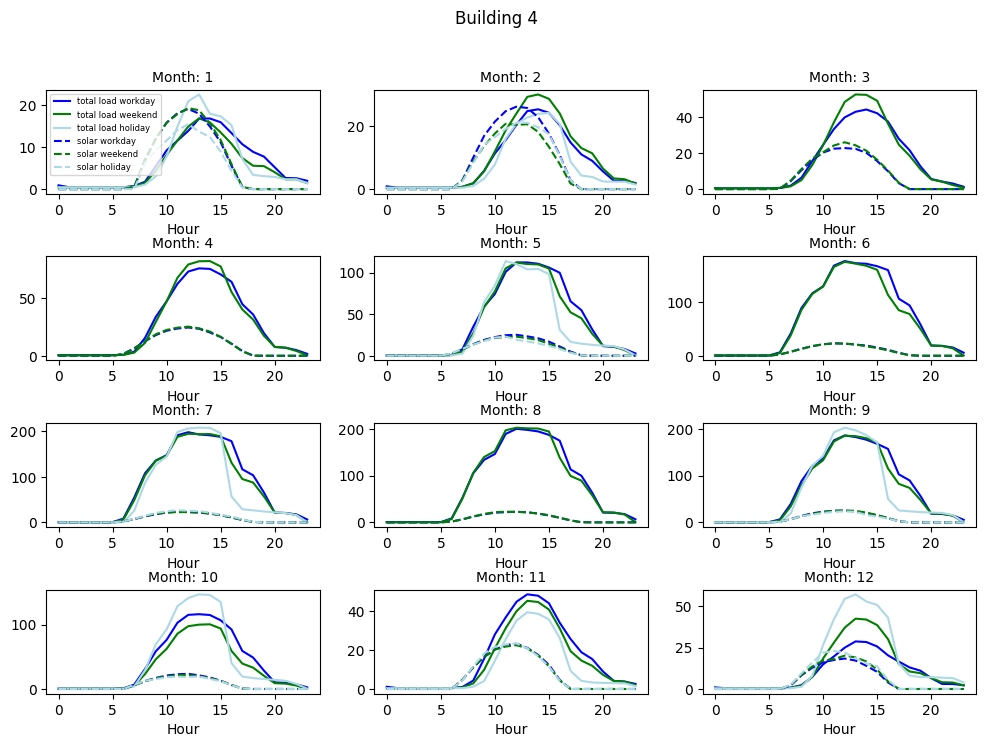

In [2263]:
df = pd.read_csv("../data/citylearn_challenge_2021/Building_4_comb.csv", parse_dates=True, index_col='datetime')

fig, ax = plt.subplots(4, 3, figsize=(12,8))

for month in range(1,13):

    # Group by workdays
    df_workday = df[(df.index.month == month) & (df.workday == True)]

    # Group by weekends
    df_weekend = df[(df.index.month == month) & (df.workday == False)]

    # Group by holidays
    df_holidays = df[(df.index.month == month) & (df.holiday == True)]

    plt.subplot(4, 3, month)
    col = "total_load"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="total load workday", color="blue")
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="total load weekend", color="green")
    df_holidays.groupby(df_holidays.index.hour)[col].mean().plot(label="total load holiday", color="lightblue")

    col = "Solar Generation [kWh]"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="solar workday", color="blue", linestyle='--')
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="solar weekend", color="green", linestyle='--')
    df_holidays.groupby(df_holidays.index.hour)[col].mean().plot(label="solar holiday", color="lightblue", linestyle='--')
    plt.xlabel('Hour')
    if month == 1:
        plt.legend(fontsize=6)
    plt.title('Month: '+str(month), fontsize=10)
fig.suptitle('Building 4')
plt.subplots_adjust(hspace=0.6)
plt.show()

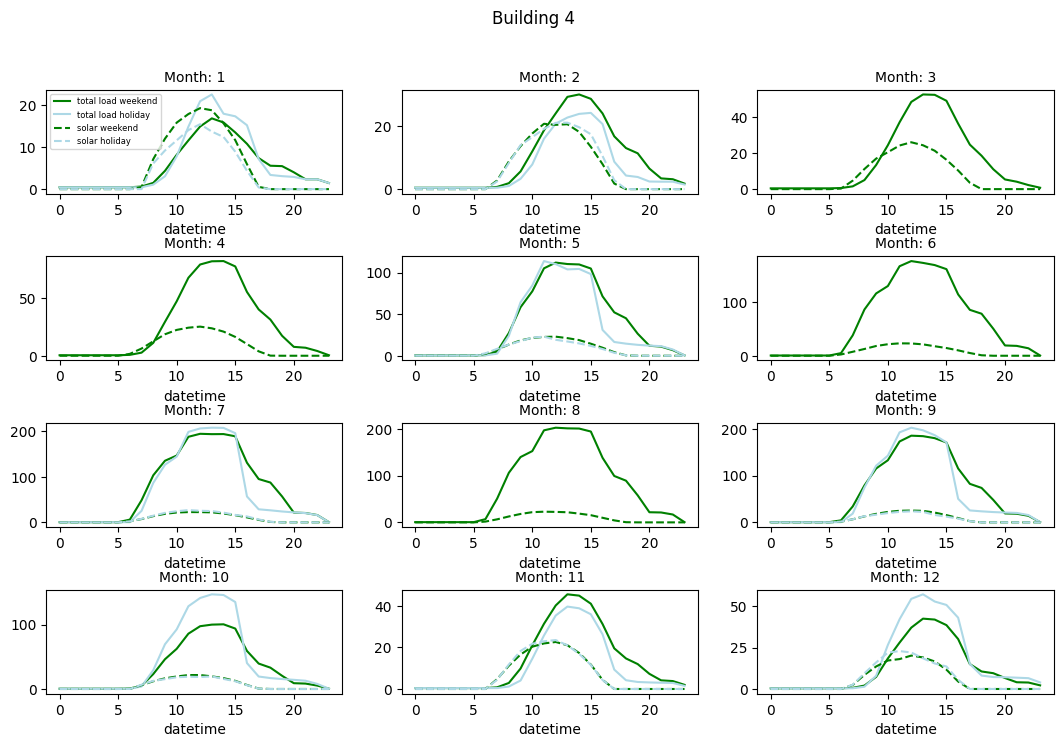

In [2264]:
df = pd.read_csv("../data/citylearn_challenge_2021/Building_4_comb.csv", parse_dates=True, index_col='datetime')

fig, ax = plt.subplots(4, 3, figsize=(13,8))

for month in range(1,13):

    # Group by workdays
    df_workday = df[(df.index.month == month) & (df.workday == True)]

    # Group by weekends
    df_weekend = df[(df.index.month == month) & (df.workday == False)]

    # Group by holidays
    df_holidays = df[(df.index.month == month) & (df.holiday == True)]

    plt.subplot(4, 3, month)
    col = "total_load"
    #df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="total load workday", color="blue")
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="total load weekend", color="green")
    df_holidays.groupby(df_holidays.index.hour)[col].mean().plot(label="total load holiday", color="lightblue")

    col = "Solar Generation [kWh]"
    #df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="solar workday", color="blue", linestyle='--')
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="solar weekend", color="green", linestyle='--')
    df_holidays.groupby(df_holidays.index.hour)[col].mean().plot(label="solar holiday", color="lightblue", linestyle='--')
    plt.title(month)
    if month == 1:
        plt.legend(fontsize=6)
    plt.title('Month: '+str(month), fontsize=10)
fig.suptitle('Building 4')
plt.subplots_adjust(hspace=0.6)
plt.show()


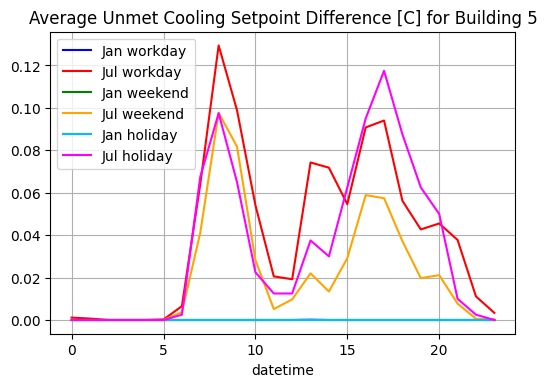

In [2265]:
fig, ax = plt.subplots(figsize=(6,4))
col = "Average Unmet Cooling Setpoint Difference [C]"
df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="Jan workday", color="blue")
df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="Jul workday", color="red")

df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="Jan weekend", color="green")
df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="Jul weekend", color="orange")

df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="Jan holiday", color="deepskyblue")
df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="Jul holiday", color="magenta")

plt.legend(loc="upper left")
plt.title("Average Unmet Cooling Setpoint Difference [C] for Building 5")
plt.grid()
plt.show()


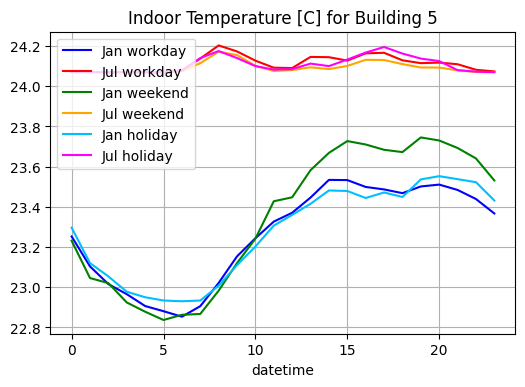

In [2266]:
fig, ax = plt.subplots(figsize=(6,4))
col = "Indoor Temperature [C]"
df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="Jan workday", color="blue")
df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="Jul workday", color="red")

df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="Jan weekend", color="green")
df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="Jul weekend", color="orange")

df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="Jan holiday", color="deepskyblue")
df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="Jul holiday", color="magenta")

plt.legend(loc="upper left")
plt.title("Indoor Temperature [C] for Building 5")
plt.grid()
plt.show()


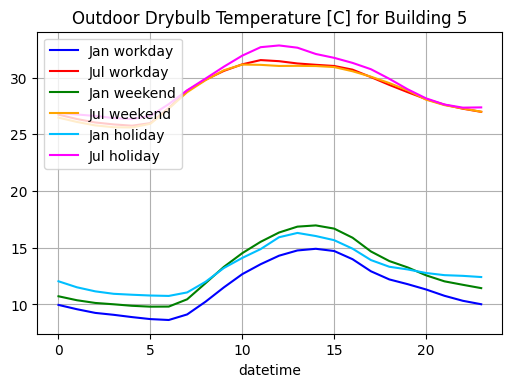

In [2267]:
fig, ax = plt.subplots(figsize=(6,4))
col = "Outdoor Drybulb Temperature [C]"
df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="Jan workday", color="blue")
df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="Jul workday", color="red")

df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="Jan weekend", color="green")
df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="Jul weekend", color="orange")

df_holiday_jan.groupby(df_holiday_jan.index.hour)[col].mean().plot(label="Jan holiday", color="deepskyblue")
df_holiday_jul.groupby(df_holiday_jul.index.hour)[col].mean().plot(label="Jul holiday", color="magenta")

plt.legend(loc="upper left")
plt.title("Outdoor Drybulb Temperature [C] for Building 5")
plt.grid()
plt.show()


In [2268]:
weather = pd.read_csv("../data/citylearn_challenge_2021/weather.csv")
#carbon = pd.read_csv("../data/citylearn_challenge_2021/carbon_intensity.csv")
b1 = pd.read_csv("../data/citylearn_challenge_2021/Building_1.csv")

for df in [weather, b1]:
        df["datetime"] = pd.date_range(start='2008-01-02 00:00:00', end='2011-12-31 23:59:59', freq='h')

weather = weather.set_index("datetime")

b1 = (b1.drop(columns=["Heating Load [kWh]"])
.assign(holiday = b1["Day Type"] == 8,)
        #datetime = pd.date_range(start='2008-01-02 01:00:00', end='2012-01-01', freq='h'))
.assign(workday = (b1.datetime.dt.weekday >= 1) & (b1.datetime.dt.weekday <= 5) & (b1["Day Type"] != 8) )
.drop(columns=["Month", "Hour", "Day Type"])
.set_index("datetime")
)

#combine both datasets
df = pd.concat([b1, weather], axis=1)

# Total load
df['total_load'] = df['Equipment Electric Power [kWh]'] + df['DHW Heating [kWh]'] + df['Cooling Load [kWh]']

# Solar generation in kWh
df['Solar Generation [kWh]'] = df['Solar Generation [W/kW]']*120/1000



In [2269]:
# Group by workdays in Jan and Jul
df_workday_jan = df[(df.index.month == 1) & (df.workday == True)]
df_workday_jul = df[(df.index.month == 7) & (df.workday == True)]

# Group by weekends in Jan and Jul
df_weekend_jan = df[(df.index.month == 1) & (df.workday == False)]
df_weekend_jul = df[(df.index.month == 7) & (df.workday == False)]

# Group by holidays in Jan and Jul
df_holiday_jan = df[(df.index.month == 1) & (df.holiday == True)]
df_holiday_jul = df[(df.index.month == 7) & (df.holiday == True)]